In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams
random_state = 42
import autoreload
%load_ext autoreload
%autoreload 2
import python_code.Scripts as sc
import python_code.Reference as ref
import pickle

from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score,precision_score
from treeinterpreter import treeinterpreter as ti
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier,ExtraTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier, VotingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

In [2]:
df = pd.read_csv("./data/final.csv")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3904 entries, 0 to 3903
Data columns (total 33 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RAWNET    3904 non-null   float64
 1   FSUSIZE   3904 non-null   float64
 2   FSNONCIT  3904 non-null   float64
 3   FSGA      3904 non-null   float64
 4   FSNETINC  3904 non-null   float64
 5   FSDIS     3904 non-null   float64
 6   TANF_IND  3904 non-null   float64
 7   REALPROP  3904 non-null   float64
 8   SHELDED   3904 non-null   float64
 9   HWGT      3904 non-null   float64
 10  FSSLTDED  3904 non-null   float64
 11  FSASSET   3904 non-null   float64
 12  FSSSI     3904 non-null   float64
 13  FSTOTDE2  3904 non-null   float64
 14  FSEARN    3904 non-null   float64
 15  TPOV      3904 non-null   float64
 16  FSSLTDE2  3904 non-null   float64
 17  LIQRESOR  3904 non-null   float64
 18  RAWERND   3904 non-null   float64
 19  FSNELDER  3904 non-null   float64
 20  FSGRINC   3904 non-null   floa

In [4]:
# Data Prep

In [5]:
X = df.drop(columns = ['CAT_ELIG'])
y = df['CAT_ELIG']

In [6]:
#baseline, NULL Model
y.value_counts(normalize=True)

1.0    0.662398
0.0    0.337602
Name: CAT_ELIG, dtype: float64

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.3,random_state=random_state)

In [8]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [9]:
np.savetxt('./data/TrainTest/X_train.csv',X_train,delimiter=',')
np.savetxt('./data/TrainTest/y_train.csv',y_train,delimiter=',')
np.savetxt('./data/TrainTest/X_test.csv',X_test,delimiter=',')
np.savetxt('./data/TrainTest/y_test.csv',y_test,delimiter=',')

In [10]:
pca = PCA(n_components=10,random_state=42)
pca.fit(X_train)
X_train_pc = pca.transform(X_train)
X_test_pc = pca.transform(X_test)

In [11]:
#Models

#Overview model selection
#White box models

#Logistic Regression
#Decision Tree
#Random Forest
#Gradient
#Ada
#SVM
#Naive Bayes

In [12]:
models = {
    'LogReg': LogisticRegression(),
    'Decision Tree':DecisionTreeClassifier(),
    'Random Forest':RandomForestClassifier(),
    'Gradient Boost':GradientBoostingClassifier(),
    'Ada Boost':AdaBoostClassifier(),
    'SVC':SVC(),
    'Naive Bayes':GaussianNB()}

In [13]:
#adapted from Dan Brown lecture
final = pd.DataFrame(columns = ['cross_val_train','cross_val_test','test_recall','test_precision'])
idx=0
while idx < len(models.keys()):
    for name,model in models.items():
        results = {}
        results['name']=name
        name=model.fit(X_train, y_train)
        y_pred_train = model.predict(X_train)
        y_pred_test = model.predict(X_test)
        results['cross_val_train'] = np.mean(cross_val_score(model,X_train,y_train,cv=4))
        results['cross_val_test'] = np.mean(cross_val_score(model,X_test,y_test,cv=4))
        results['test_recall'] = recall_score(y_test, y_pred_test)
        results['test_precision'] = precision_score(y_test, y_pred_test)
        final = final.append(results,ignore_index=True)
        idx+=1
        

In [14]:
final.set_index('name')

,cross_val_train,cross_val_test,test_recall,test_precision
name,,,,
LogReg,0.884334,0.862628,0.900262,0.903821
Decision Tree,0.903001,0.911263,0.935696,0.938158
Random Forest,0.940703,0.934300,0.963255,0.956975
Gradient Boost,0.940337,0.927474,0.955381,0.951634
Ada Boost,0.922035,0.920648,0.937008,0.939474
SVC,0.884700,0.854949,0.901575,0.928378
Naive Bayes,0.767204,0.741468,0.833333,0.908441


In [15]:
# Random Forest performed the best. Train and test values are similar and above 0.662398 baseline

In [16]:
#Adding PCA to the data and comparing the scores:

In [17]:
pc_final = pd.DataFrame(columns = ['cross_val_train','cross_val_test','test_recall','test_precision'])
idx=0
while idx < len(models.keys()):
    for name,model in models.items():
        results = {}
        results['name']=name
        name=model.fit(X_train_pc, y_train)
        y_pred_train = model.predict(X_train_pc)
        y_pred_test = model.predict(X_test_pc)
        results['cross_val_train'] = np.mean(cross_val_score(model,X_train_pc,y_train,cv=4))
        results['cross_val_test'] = np.mean(cross_val_score(model,X_test_pc,y_test,cv=4))
        results['test_recall'] = recall_score(y_test, y_pred_test)
        results['test_precision'] = precision_score(y_test, y_pred_test)
        pc_final = pc_final.append(results,ignore_index=True)
        idx+=1

In [18]:
pc_final.set_index('name')

,cross_val_train,cross_val_test,test_recall,test_precision
name,,,,
LogReg,0.783675,0.763652,0.892388,0.770102
Decision Tree,0.831625,0.808020,0.896325,0.877892
Random Forest,0.884700,0.860922,0.934383,0.896725
Gradient Boost,0.877379,0.860922,0.908136,0.882653
Ada Boost,0.852855,0.848123,0.900262,0.879487
SVC,0.831991,0.834471,0.874016,0.871728
Naive Bayes,0.726940,0.713311,0.958005,0.692600


In [19]:
# Model Selection
# The best performing models are Random Forest and Gradient Boost without PCA. PCA seemed to exaggerate overfitting on all models. 
# The Gradient Boost has the least overfitting. Therefore, I will GridSearch over a RandomForest with Gradient Boost. Just to make sure, 
#I will check out the classification report for each model to verify each class is represented fairly well.


In [20]:
for name,model in models.items():
    name = model.fit(X_train,y_train)
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)
    print(name)
    print(classification_report(y_test, y_pred_test))
    print('\n')

LogisticRegression()
              precision    recall  f1-score   support

         0.0       0.82      0.82      0.82       410
         1.0       0.90      0.90      0.90       762

    accuracy                           0.87      1172
   macro avg       0.86      0.86      0.86      1172
weighted avg       0.87      0.87      0.87      1172



DecisionTreeClassifier()
              precision    recall  f1-score   support

         0.0       0.89      0.89      0.89       410
         1.0       0.94      0.94      0.94       762

    accuracy                           0.92      1172
   macro avg       0.92      0.92      0.92      1172
weighted avg       0.92      0.92      0.92      1172



RandomForestClassifier()
              precision    recall  f1-score   support

         0.0       0.94      0.92      0.93       410
         1.0       0.96      0.97      0.96       762

    accuracy                           0.95      1172
   macro avg       0.95      0.94      0.95      1172

In [21]:
# The Random Forest and Gradient Boosting represent the classes most fairly among all other models. 
# Since there is an inbalance of classes for the target variable (2007 data had some people who qualified and some who didn't, whereas everyone qualified for SNAP in 2017)
# I would expect boosting would be essential to this model.

In [22]:
#Running models
#Random forest
#I will start with Random Forest for interpretability.

In [54]:
rf = RandomForestClassifier()
params={'max_depth':[None,5,15],
       'max_features':[None,'log2'],
       'n_estimators':[100,125,200]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9454587460071922


{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 125}

In [55]:
rf = RandomForestClassifier()
rf.fit(X_train,y_train)

RandomForestClassifier()

In [56]:
# Following code adapted from Demystify the random forest and Visualizing Dot-Whisker Regression Coefficients in Python

In [57]:
instances = X_test[[735]]
instances

array([[-0.88061189,  1.02614408,  1.78070948, -0.1335093 , -0.8826584 ,
        -0.51403261, -0.36488324, -0.03517855,  1.00652396, -0.51614194,
         1.0459183 , -0.24309398, -0.42833737, -1.28640995, -0.59800159,
        -1.49056789, -0.87253073, -0.24501332, -0.59885312, -0.40909055,
        -1.25472977, -0.59758589, -0.55893964,  0.39411313, -1.59315573,
        -0.76825854, -0.34230342, -0.56404251, -0.91848291,  1.02614408,
        -0.35352552, -0.02833014]])

In [58]:
ft_list = []
prediction, bias, contributions = ti.predict(rf, instances)
print( "Prediction", prediction)
print( "Bias (trainset prior)", bias)
print ("Feature contributions:")
for c, feature in zip(contributions[0], 
                             X.columns):
    ft_list.append((feature, np.round(c, 2)))
    print (feature, c)
    
labels, values = zip(*ft_list)

Prediction [[0.6 0.4]]
Bias (trainset prior) [[0.33175695 0.66824305]]
Feature contributions:
RAWNET [ 0.00047838 -0.00047838]
FSUSIZE [ 0.00147799 -0.00147799]
FSNONCIT [ 0.01648173 -0.01648173]
FSGA [ 0.0038796 -0.0038796]
FSNETINC [-0.00615081  0.00615081]
FSDIS [0. 0.]
TANF_IND [ 0.01664026 -0.01664026]
REALPROP [0. 0.]
SHELDED [ 0.0794057 -0.0794057]
HWGT [ 0.05430563 -0.05430563]
FSSLTDED [ 0.07486041 -0.07486041]
FSASSET [-0.02530742  0.02530742]
FSSSI [ 0.01362397 -0.01362397]
FSTOTDE2 [ 0.00978374 -0.00978374]
FSEARN [-0.00910046  0.00910046]
TPOV [-0.01477263  0.01477263]
FSSLTDE2 [ 0.00294802 -0.00294802]
LIQRESOR [-0.02408743  0.02408743]
RAWERND [-0.00951232  0.00951232]
FSNELDER [ 0.00077669 -0.00077669]
FSGRINC [-0.00465547  0.00465547]
FSERNDED [-0.01592842  0.01592842]
FSWAGES [-0.00671388  0.00671388]
FSTOTDED [ 0.00410166 -0.00410166]
FSSTDDE2 [ 0.03275203 -0.03275203]
WRK_POOR [-0.00612586  0.00612586]
FSTANF [ 0.02116805 -0.02116805]
FSERNDE2 [-0.0070792  0.0070792

In [59]:
df1 = pd.DataFrame(ft_list,columns=['feature','array'])
df2 = pd.DataFrame(df1["array"].to_list(), columns=['pred_0', 'pred_1'])
coef_df = pd.concat([df1,df2],axis=1).drop(columns=['array'])
coef_df.to_csv('./data/2018_indicators/coef.csv',index=None)

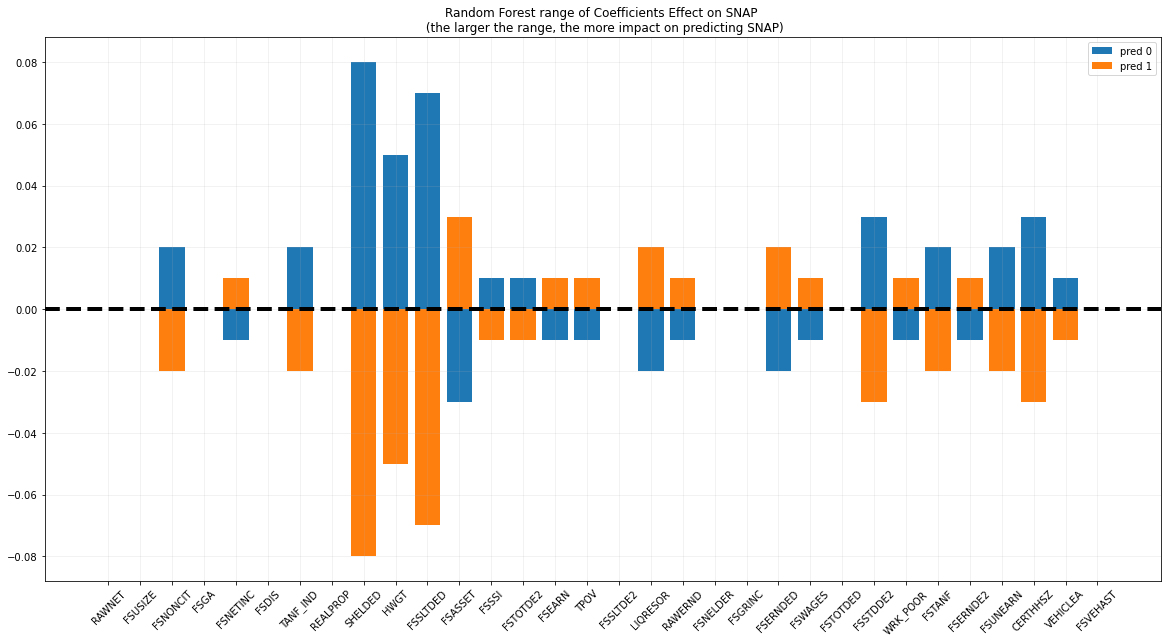

In [60]:
fig, ax = plt.subplots(figsize=(20,10))
plt.title('Random Forest range of Coefficients Effect on SNAP \n (the larger the range, the more impact on predicting SNAP)')
plt.grid(zorder=0,alpha = 0.2)
xs = np.arange(len(labels))
ax.bar(xs,coef_df['pred_0'], label = 'pred 0')
ax.bar(xs,coef_df['pred_1'],label = 'pred 1')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.set_xticks(coef_df.index)
ax.set_xticklabels(coef_df['feature'],rotation = 45)
plt.legend()
plt.savefig('./images/rf_corr.png');

In [61]:
# Extra Tree Classifier
# I will compare a gridsearch Extra Tree classifier to see if it should be added to the ensemble.

In [62]:
et = ExtraTreeClassifier()
params={'max_depth':[None,3,4],
       'max_features':[None,'auto'],
       'max_leaf_nodes':[5,10]}
et_gs = GridSearchCV(et,param_grid=params)
et_gs.fit(X_train,y_train)
print(et_gs.best_score_)
et_gs.best_params_

0.8173440210003282


{'max_depth': None, 'max_features': None, 'max_leaf_nodes': 10}

In [63]:
# It seems the random with replacement that isn't offered in the Extra Tree Classifier is important to predicting SNAP eligibility. 
# Further magnifying the more than slight class imbalance of the target column. Therefore, Extra Tree Classifier will not be used in the Ensemble.

In [64]:
# Bagging Classifier
# Since there is slight overfitting due to less variability in my target class, I will test a bagging classifier to see if I should place it in my Vote Ensemble.

In [65]:
bag = BaggingClassifier()
bag.fit(X_train,y_train)
y_pred_train = bag.predict(X_train)
y_pred_test = bag.predict(X_test)
print(f'cross_val_train = {np.mean(cross_val_score(model,X_train_pc,y_train,cv=4))}')
print(f'cross_val_test = {np.mean(cross_val_score(model,X_test_pc,y_test,cv=4))}')
print(f'test_recall = {recall_score(y_test, y_pred_test)}')
print(f'test_precision = {precision_score(y_test, y_pred_test)}')

cross_val_train = 0.7269399707174231
cross_val_test = 0.7133105802047782
test_recall = 0.9461942257217848
test_precision = 0.9499341238471674


In [66]:
#The cross val score is low for both train and test, but it doesn't appear to be overfitting. 
#The test recall and precision is actually very high, meaning it is predicting positives very acurately. I will therefore add it to my vote ensemble. 
# Because predicting positive (ie. those that are projected to be on SNAP) is more beneficial in targeting groups that are at risk.

In [67]:
#Vote Ensemble Random Forest
# The course ran black box models by gridsearching through a Gradient Boosting and Bagging Classifier Vote Ensemble. 
# Which was run in another notebook. 

In [68]:
# Final Model

In [69]:
vote = VotingClassifier([
    ('rf',RandomForestClassifier(bootstrap=False,n_estimators=1000)),
    ('gb',GradientBoostingClassifier(max_depth=10,subsample=0.8)),
    ('bag',BaggingClassifier(n_estimators = 10))
])

In [70]:
vote.fit(X_train,y_train)

VotingClassifier(estimators=[('rf',
                              RandomForestClassifier(bootstrap=False,
                                                     n_estimators=1000)),
                             ('gb',
                              GradientBoostingClassifier(max_depth=10,
                                                         subsample=0.8)),
                             ('bag', BaggingClassifier())])

In [71]:
filename = 'final_model.sav'
pickle.dump(vote, open(filename, 'wb'))

In [41]:
# Reiteration of model 

In [42]:
rf = RandomForestClassifier()
params={'max_depth':[None,3,4],
       'max_features':[None,'auto'],
       'n_estimators':[75,100,125]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9432636224226718


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}

In [43]:
rf = RandomForestClassifier()
params={'max_depth':[None,4,5],
       'max_features':[None,'auto'],
       'n_estimators':[75,100,125]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9447274845812323


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 125}

In [44]:
rf = RandomForestClassifier()
params={'max_depth':[None,4,5],
       'max_features':[None,'auto'],
       'n_estimators':[20,50,75]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9421660606304118


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 75}

In [45]:
rf = RandomForestClassifier()
params={'max_depth':[None,4,5],
       'max_features':[None,'auto'],
       'n_estimators':[100,125,200]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9432629527693515


{'max_depth': None, 'max_features': 'auto', 'n_estimators': 100}

In [46]:
rf = RandomForestClassifier()
params={'max_depth':[None,5,15],
       'max_features':[None,'auto'],
       'n_estimators':[75,100,125]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9454607549671536


{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 125}

In [47]:
rf = RandomForestClassifier()
params={'max_depth':[None,5,15],
       'max_features':[None,'auto'],
       'n_estimators':[100,125,200]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9469212688591118


{'max_depth': 15, 'max_features': 'auto', 'n_estimators': 100}

In [48]:
rf = RandomForestClassifier()
params={'max_depth':[None,15,25],
       'max_features':[None,'auto'],
       'n_estimators':[100,125,200]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.945461424620474


{'max_depth': 25, 'max_features': 'auto', 'n_estimators': 125}

In [49]:
rf = RandomForestClassifier()
params={'max_depth':[None,5,15],
       'max_features':[None,'sqrt'],
       'n_estimators':[100,125,200]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9458277249867744


{'max_depth': 15, 'max_features': 'sqrt', 'n_estimators': 100}

In [50]:
rf = RandomForestClassifier()
params={'max_depth':[None,5,15],
       'max_features':[None,'log2'],
       'n_estimators':[100,125,200]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9461920163931132


{'max_depth': None, 'max_features': 'log2', 'n_estimators': 125}

In [51]:
rf = RandomForestClassifier()
params={'max_depth':[None,5,15],
       'max_features':['sqrt','log2'],
       'n_estimators':[100,125,200]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9458277249867744


{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 100}

In [52]:
rf = RandomForestClassifier()
params={'max_depth':[5,15,25],
       'max_features':[None,'log2'],
       'n_estimators':[100,125,200]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9461900074331518


{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 100}

In [53]:
rf = RandomForestClassifier()
params={'max_depth':[5,15,25],
       'max_features':[None,'log2'],
       'n_estimators':[75,100,125]}
rf_gs = GridSearchCV(rf,param_grid=params)
rf_gs.fit(X_train,y_train)
print(rf_gs.best_score_)
rf_gs.best_params_

0.9432636224226719


{'max_depth': 15, 'max_features': 'log2', 'n_estimators': 75}